In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_percentage_error

In [4]:
df = pd.read_csv('../data/non_final/Master_data.csv')
print(df.shape)
df #So two more features than last time - the formal date year and 

(247, 69)


,Unnamed: 0,date,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,...,cc_bals_90d_due_percentage,Mortgage_servicing,cc_payments,cc_payments_yoy,Mortgage_servicing_yoy,cc_bals_30d_due_percentage_yoy,cc_bals_90d_due_percentage_yoy,cc_bals_30d_due_percentage_yoy_3m,cc_bals_30d_due_percentage_yoy_6m,cc_bals_30d_due_percentage_6m
0,0,2003-01-01,2003,January,289412000.0,5.8,NaN,2.597403,3.120429,14.145031,...,NaN,29.236872,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN
1,1,2003-02-01,2003,February,289606000.0,5.9,NaN,2.980877,2.718447,21.981982,...,NaN,29.679900,8.49618,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN
2,2,2003-03-01,2003,March,289809000.0,5.9,NaN,3.020134,2.520601,23.356401,...,NaN,29.184600,8.46384,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN
3,3,2003-04-01,2003,April,290024000.0,6.0,NaN,2.224694,2.222222,13.011457,...,NaN,29.527500,8.43150,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN
4,4,2003-05-01,2003,May,290250000.0,6.1,NaN,2.057842,2.507232,9.031733,...,NaN,28.423572,8.39916,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,242,2023-03-01,2023,March,334664000.0,3.5,4.616834,4.984974,8.175182,-6.424898,...,1.330000,78.619616,20.97054,60.285403,65.492112,51.559633,26.605505,50.328947,NaN,NaN
243,243,2023-04-01,2023,April,334792000.0,3.4,4.663537,4.930320,8.095818,-5.064848,...,1.320000,76.198795,21.22829,60.191989,34.304782,53.333333,27.222222,49.065421,NaN,NaN
244,244,2023-05-01,2023,May,334929000.0,3.7,4.551122,4.047609,8.026785,-11.663368,...,1.386667,77.999500,22.48636,60.671371,27.807544,51.742160,26.829268,NaN,NaN,NaN
245,245,2023-06-01,2023,June,335080000.0,3.6,4.658385,2.969178,7.798839,-16.738092,...,1.453333,81.507960,22.48636,56.734870,26.494016,50.328947,26.480263,NaN,NaN,NaN


In [5]:
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
df.head()

,Unnamed: 0,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,...,cc_bals_90d_due_percentage,Mortgage_servicing,cc_payments,cc_payments_yoy,Mortgage_servicing_yoy,cc_bals_30d_due_percentage_yoy,cc_bals_90d_due_percentage_yoy,cc_bals_30d_due_percentage_yoy_3m,cc_bals_30d_due_percentage_yoy_6m,cc_bals_30d_due_percentage_6m
date,,,,,,,,,,,,,,,,,,,,,
2003-01-01,0,2003,January,289412000.0,5.8,NaN,2.597403,3.120429,14.145031,4.610436,...,NaN,29.236872,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2003-02-01,1,2003,February,289606000.0,5.9,NaN,2.980877,2.718447,21.981982,4.493581,...,NaN,29.679900,8.49618,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2003-03-01,2,2003,March,289809000.0,5.9,NaN,3.020134,2.520601,23.356401,4.264392,...,NaN,29.184600,8.46384,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2003-04-01,3,2003,April,290024000.0,6.0,NaN,2.224694,2.222222,13.011457,3.997170,...,NaN,29.527500,8.43150,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2003-05-01,4,2003,May,290250000.0,6.1,NaN,2.057842,2.507232,9.031733,3.980275,...,NaN,28.423572,8.39916,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [6]:
#I'll just add one feature called covid, for now limiting it to simply anything in 2020, 2021, and 2022

#Later decided to commnet out.

# covid_dates = [2020, 2021, 2022]
# df['covid_year'] = [1 if i in covid_dates else 0 for i in df['year']]
# df['covid_year'].value_counts()

In [7]:
sample = df[df['cc_balance_total_billions'].notnull()]
print(sum(sample.isnull().sum()))
print(sample.shape)

15
(133, 68)


In [8]:
sample

,Unnamed: 0,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,...,cc_bals_90d_due_percentage,Mortgage_servicing,cc_payments,cc_payments_yoy,Mortgage_servicing_yoy,cc_bals_30d_due_percentage_yoy,cc_bals_90d_due_percentage_yoy,cc_bals_30d_due_percentage_yoy_3m,cc_bals_30d_due_percentage_yoy_6m,cc_bals_30d_due_percentage_6m
date,,,,,,,,,,,,,,,,,,,,,
2012-07-01,114,2012,July,314796000.0,8.2,1.731602,1.408451,2.112106,-5.022144,4.110711,...,1.610000,28.499400,8.079013,-6.651669,-25.369019,0.000000,0.000000,0.000000,0.0,2.950000
2012-08-01,115,2012,August,315031000.0,8.1,1.777200,1.692379,2.107566,-0.556204,4.028033,...,1.616667,28.934866,8.114050,-6.143003,-18.041664,0.000000,0.000000,0.000000,0.0,2.946667
2012-09-01,116,2012,September,315264000.0,7.8,1.946367,1.991282,2.202495,2.336314,4.040507,...,1.623333,28.095417,8.098207,-6.529243,-17.240839,0.000000,0.000000,0.000000,0.0,2.943333
2012-10-01,117,2012,October,315485000.0,7.8,1.551724,2.162344,2.224469,3.993740,3.712741,...,1.630000,27.171623,8.082363,-6.913813,-19.204431,0.000000,0.000000,0.000000,0.0,2.940000
2012-11-01,118,2012,November,315692000.0,7.7,1.897370,1.764134,2.206854,0.322869,3.390749,...,1.623333,26.588064,7.840800,-6.545532,-18.657597,0.000000,0.000000,0.000000,0.0,2.786667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,242,2023,March,334664000.0,3.5,4.616834,4.984974,8.175182,-6.424898,1.495750,...,1.330000,78.619616,20.970540,60.285403,65.492112,51.559633,26.605505,50.328947,NaN,NaN
2023-04-01,243,2023,April,334792000.0,3.4,4.663537,4.930320,8.095818,-5.064848,1.053688,...,1.320000,76.198795,21.228290,60.191989,34.304782,53.333333,27.222222,49.065421,NaN,NaN
2023-05-01,244,2023,May,334929000.0,3.7,4.551122,4.047609,8.026785,-11.663368,0.724042,...,1.386667,77.999500,22.486360,60.671371,27.807544,51.742160,26.829268,NaN,NaN,NaN


In [9]:
df.isnull().sum()[-6:]

Mortgage_servicing_yoy                 0
cc_bals_30d_due_percentage_yoy         0
cc_bals_90d_due_percentage_yoy         0
cc_bals_30d_due_percentage_yoy_3m      3
cc_bals_30d_due_percentage_yoy_6m      6
cc_bals_30d_due_percentage_6m        114
dtype: int64

In [10]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=18):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

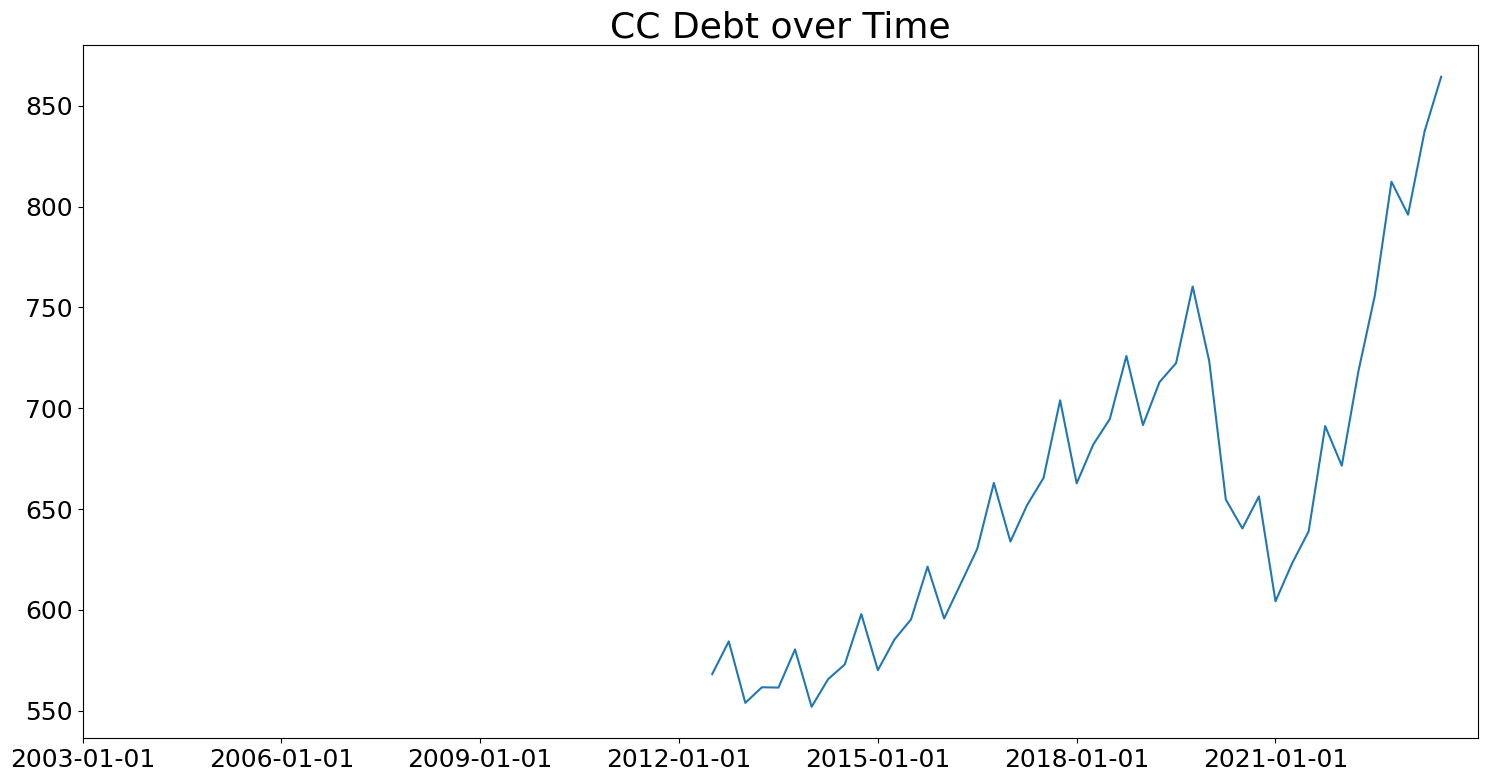

In [11]:
plot_series(df, ['cc_balance_total_billions'], title = "CC Debt over Time", steps=36)

In [13]:
df['cc_balance_total_billions'].describe()

count    133.000000
mean     656.183459
std       75.525776
min      551.970000
25%      589.616667
50%      649.973333
75%      702.596667
max      864.340000
Name: cc_balance_total_billions, dtype: float64

In [15]:
# #Hmm, and let's deal with nulls....
# for i in df.columns:
#     print(i)
#     if df[i].isnull().sum() > 0 and df[i].dtype != 'object':
#         df[i].fillna(df[i].median())
# df['shelter_yoy'].isnull().sum()

In [15]:
#Fine, let's do this. No nulls in our subset, let's go!
focus = sample.copy()
focus.shape

(133, 68)

In [16]:
focus['cc_bals_30d_due_percentage']

date
2012-07-01    3.150000
2012-08-01    3.130000
2012-09-01    3.110000
2012-10-01    3.090000
2012-11-01    3.043333
                ...   
2023-03-01    2.753333
2023-04-01    2.760000
2023-05-01    2.903333
2023-06-01    3.046667
2023-07-01    3.190000
Name: cc_bals_30d_due_percentage, Length: 133, dtype: float64

In [23]:
X = focus.drop(columns=['year', 'month', 'Qtr', 'cc_balance_total_billions', 'cc_rate_all_ns', 'cc_bals_30d_due_percentage', 'cc_bals_90d_due_percentage'], axis=1)
y_30 = focus['cc_bals_30d_due_percentage']#we'll start with this one
y_90 = focus['cc_bals_90d_due_percentage']
print(X.shape, y_30.shape)

(133, 61) (133,)


In [24]:
#Starting off to get some base-feature focus we'll do a simple linear regression model, albeit tweaked.
#So, we'll ignore the time factor for now, at least we'll try to:
X_train, X_test, y_train, y_test = train_test_split(X, y_30, test_size=.1,
                                                    random_state=26,
                                                    shuffle=True)

In [25]:
#In short, please please please when working in a group to never change datasets that have already been named. Perhaps
#errors and edits, but re. adding new features...

ss = StandardScaler()
X_train_fit = ss.fit_transform(X_train)
X_test_fit = ss.transform(X_test)

In [ ]:
#Default model to get started with
lr = LinearRegression()

In [ ]:
#Insets to log stuff
rfe_30_dict = []

for i in range(5,30):
    rfe_30 = RFE(lr, n_features_to_select=i, step=1)
    rfe_30.fit(X_train_fit,y_train)
    rfe_30_dict.append(
        [i,
        rfe_30.score(X_train_fit, y_train),
        rfe_30.score(X_test_fit, y_test),
        rfe_30.score(X_train_fit, y_train) - rfe_30.score(X_test_fit, y_test),
        abs(rfe_30.score(X_train_fit, y_train) - rfe_30.score(X_test_fit, y_test))
         
        ])

In [ ]:
bro = pd.DataFrame(rfe_30_dict)
print(bro.shape)
bro.head()

In [ ]:
bro[bro[4] == bro[4].min()]

In [ ]:
bro[bro[2] == bro[2].max()]

In [ ]:
rfe_30 = RFE(lr, n_features_to_select=27, step=1)
rfe_30.fit(X_train_fit,y_train)
print(rfe_30.score(X_train_fit, y_train), rfe_30.score(X_test_fit, y_test))
sugg_columns = X.columns[rfe_30.get_support()]
print(X.columns[rfe_30.get_support()])

In [ ]:
list(sugg_columns)

In [ ]:
rfe_30 = RFE(lr, n_features_to_select=40, step=1)

In [ ]:
rfe_30.fit(X_train_fit,y_train)

In [ ]:
rfe_30.ranking_

In [ ]:
rfe_30.score(X_train_fit, y_train), rfe_30.score(X_test_fit, y_test)

In [ ]:
rfe_30.get_support(indices=True)

In [ ]:
rfe_30.support_

In [ ]:
X.columns[rfe_30.get_support()]

In [ ]:
rfe_30.verbose

In [ ]:
list(sugg_columns)

In [ ]:
#All right, let's try to do SARIMA now:
# focus['first_diff_30'] = focus['cc_bals_30d_due_percentage'].diff()
# focus['second_diff_30'] = focus['cc_bals_30d_due_percentage'].diff().diff()
# focus['first_diff_90'] = focus['cc_bals_90d_due_percentage'].diff()
# focus['second_diff_90'] = focus['cc_bals_90d_due_percentage'].diff().diff()

In [ ]:
from datetime import datetime
# import statsmodels.api as sm
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
X = focus[list(sugg_columns)]
X.shape
#Y is stll the same... will keep as is for now.

In [ ]:
#Hmm, I guess we'll shift everything a perod:

In [ ]:
X_shift = X.shift()
X_shift #Reminder that the last row would essentially get punted. Howeve, that last row could later be used a as a val. data
#of sorts...

In [ ]:
X_shift = X_shift.dropna()
X_shift.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_shift, y_30[1:], test_size=.1,
                                                    shuffle=False)

In [ ]:
ss = StandardScaler()
X_train_fit = ss.fit_transform(X_train)
X_test_fit = ss.transform(X_test)

In [ ]:
gahgaha

## Initial Model attempt:

In [ ]:
# Starting MSE and (P, D, Q, S.
best_aic = 100_000_000
final_p = final_d = final_q = 0
final_P = final_D = final_Q = final_S =0

for p in range(3):
    for q in range(3):
        for d in range(3):
            for P in range(3):
                for Q in range(3):
                    for D in range(3):
                        for S in range(0,4,1):
                            try:
                                print(f'Attempting to fit SARIMAX({p}, {d}, {q})x({P},{D},{Q},{S})')
                    # Instantiate SARIMAX model.
                                sarimax = SARIMAX(endog = y_train,
                                     order = (p, q, d),              # (p, d, q)
                                     seasonal_order = (P, D, Q, S),  # (P, D, Q, S)
                                     exog = X_train_fit) 
 
                    # Fit SARIMAX model.
                                model = sarimax.fit()

                    # Generate predictions based on test set.
                                preds = model.predict(start=datetime(2022,7,1),
                                          end=datetime(2023,7,1),
                                          exog=X_test_fit)

                    # Evaluate predictions.
                                print(f'The AIC for ({p}, {d}, {q})x({P},{D},{Q},{S}) is: {model.aic}')

                    # Save for final report.
                                if best_aic > model.aic:
                                    best_aic = model.aic
                                    final_p = p
                                    final_d = d
                                    final_q = q
                                    final_P = P
                                    final_D = D
                                    final_Q = Q
                                    final_S = S

                            except:
                                pass

print(f'Our model that minimizes AIC on the testing data is the SARIMAX(({final_p}, {final_d}, {final_q})x({final_P},{final_D},{final_Q},{final_S}).')
print(f'This model has an MSE of {best_aic}.')

In [ ]:
final_p, final_d, final_q, final_P, final_D, final_Q, final_S

In [ ]:
sarima = SARIMAX(endog=y_train,
                order=(0,0,2), seasonal_order=(1, 2, 1, 3),
                exog=X_train_fit)


# Fit SARIMA model.
model = sarima.fit()

# Generate predictions based on test set.
preds = model.predict(start = datetime(2022,7,1), end=datetime(2023,7,1),
                     exog =X_test_fit)

print(model.aic)

#Conversions, at least needed for this data.Thank you Eric!
y_train_notcontroversial, y_test_notcontroversial = y_train.copy(), y_test.copy()
y_train_notcontroversial.index = pd.to_datetime(y_train.index)
y_test_notcontroversial.index = pd.to_datetime(y_test.index)


# Plot data.
plt.figure(figsize=(10,6))
plt.plot(y_train_notcontroversial, color = 'blue')
plt.plot(y_test_notcontroversial, color = 'orange')
plt.plot(preds, color = 'green')
plt.title(label = 'Current best SARIMAX for analyzing trends in credit card debt (30 days)', fontsize=16)
plt.show();

In [ ]:
y_test.dtype

In [ ]:
preds = pd.DataFrame(preds)
preds

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_shift, y_90[1:], test_size=.1,
                                                    shuffle=False)

ss = StandardScaler()
X_train_fit = ss.fit_transform(X_train)
X_test_fit = ss.transform(X_test)

In [ ]:
# Starting MSE and (P, D, Q, S).
best_aic = 100_000_000
final_p = final_d = final_q = 0
final_P = final_D = final_Q = final_S =0


for p in range(2):
    for q in range(2):
        for d in range(3):
            for P in range(3):
                for Q in range(3):
                    for D in range(3):
                        for S in range(0,6,1):
                            try:
                                print(f'Attempting to fit SARIMAX({p}, {d}, {q})x({P},{D},{Q},{S})')
                    # Instantiate SARIMAX model.
                                sarimax = SARIMAX(endog = y_train,
                                     order = (p, q, d),              # (p, d, q)
                                     seasonal_order = (P, D, Q, S),  # (P, D, Q, S)
                                     exog = X_train_fit) 
 
                    # Fit SARIMAX model.
                                model = sarimax.fit()

                    # Generate predictions based on test set.
                                preds = model.predict(start=datetime(2022,7,1),
                                          end=datetime(2023,7,1),
                                          exog=X_test_fit)

                    # Evaluate predictions.
                                print(f'The AIC for ({p}, {d}, {q})x({P},{D},{Q},{S}) is: {model.aic}')

                    # Save for final report.
                                if best_aic > model.aic:
                                    best_aic = model.aic
                                    final_p = p
                                    final_d = d
                                    final_q = q
                                    final_P = P
                                    final_D = D
                                    final_Q = Q
                                    final_S = S

                            except:
                                pass

print(f'Our model that minimizes AIC on the testing data is the SARIMAX(({final_p}, {final_d}, {final_q})x({final_P},{final_D},{final_Q},{final_S}).')
print(f'This model has an AIC of {best_aic}.')

In [ ]:
sarima = SARIMAX(endog=y_train,
                order=(0,0,1), seasonal_order=(2, 2, 0, 3),
                exog=X_train_fit)


# Fit SARIMA model.
model = sarima.fit()
print(model.aic)
# Generate predictions based on test set.
preds = model.predict(start = datetime(2022,7,1), end=datetime(2023,7,1),
                     exog =X_test_fit)

#Conversions, at least needed for this data.Thank you Eric!
y_train_notcontroversial, y_test_notcontroversial = y_train.copy(), y_test.copy()
y_train_notcontroversial.index = pd.to_datetime(y_train.index)
y_test_notcontroversial.index = pd.to_datetime(y_test.index)


# Plot data.
plt.figure(figsize=(10,6))
plt.plot(y_train_notcontroversial, color = 'blue')
plt.plot(y_test_notcontroversial, color = 'orange')
plt.plot(preds, color = 'green')
plt.title(label = 'Current best SARIMAX for analyzing trends in credit card debt (90 days)', fontsize=16)
plt.show();

In [ ]:
#Yeah, after considering both models this time around...

In [ ]:
#Hmm, let's go to VAR next. Besides the serious consideration of new_&_used_vehicles_yoy, being approx. -.5 with them,
#I think I'm going to get rid of covid.... ie when the dates I graphed don't accurately portray it going down...
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [ ]:
interpret_dftest(adfuller(focus['cc_bals_30d_due_percentage'])) #Should have done this earlier, but eh...
#And phew, we were good all along.

In [ ]:
interpret_dftest(adfuller(focus['cc_bals_90d_due_percentage']))

In [ ]:
interpret_dftest(adfuller(focus['new_&_used_vehicles_yoy'].diff().diff().dropna())) #Hmm, and now we got somewhere.

In [ ]:
focus['diff__used_vehicles_yoy'] = focus['new_&_used_vehicles_yoy'].diff().diff()
focus['diff__used_vehicles_yoy'].head()#Hmm, so given that we have to go to the second derivative with 

In [ ]:
sugg_columns

In [ ]:
X = focus[list(sugg_columns)].drop(columns=['new_&_used_vehicles_yoy'], axis=1)
print(X.shape)
X_shift = X.shift(2)

X_train, X_test, y_train, y_test = train_test_split(X_shift, y_30[2:], test_size=.1,
                                                    shuffle=False)

In [ ]:
ss = StandardScaler()
X_train_fit = ss.fit_transform(X_train)
X_test_fit = ss.transform(X_test)